In [99]:
import pandas as pd
!wget https://raw.githubusercontent.com/Tom99H/Metorites/main/Meteorite_Landings.csv
Meteorite_data = pd.read_csv('Meteorite_Landings.csv')
Meteorite_data.head()

--2023-04-20 10:19:01--  https://raw.githubusercontent.com/Tom99H/Metorites/main/Meteorite_Landings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3952161 (3.8M) [text/plain]
Saving to: ‘Meteorite_Landings.csv.22’

Meteorite_Landings. 100%[===================>]   3.77M  --.-KB/s    in 0.03s   

2023-04-20 10:19:01 (129 MB/s) - ‘Meteorite_Landings.csv.22’ saved [3952161/3952161]



,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [100]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [103]:
data_new = Meteorite_data[Meteorite_data['mass (g)']<13241]

In [104]:
data_new = Meteorite_data[Meteorite_data['mass (g)']<2000]

In [105]:
data_new2 =  data_new[data_new['mass (g)']>0]

In [106]:
X, y = data_new2[['id','year', 'reclat', 'reclong']].values, data_new2['mass (g)'].values
print('Features:',X[:4], '\nLabels:', y[:5], sep='\n')

Features:
[[ 1.000000e+00  1.880000e+03  5.077500e+01  6.083330e+00]
 [ 2.000000e+00  1.951000e+03  5.618333e+01  1.023333e+01]
 [ 1.000000e+01  1.976000e+03  1.688333e+01 -9.990000e+01]
 [ 3.700000e+02  1.902000e+03 -3.316667e+01 -6.495000e+01]]

Labels:
[  21.  720. 1914.  780.  910.]


In [107]:
X = X.astype(float)
y = y.astype(float)

In [108]:
print(np.median(y))

26.0


In [109]:
print(np.average(y))

149.23579311651702


In [110]:
#y_log = np.log10(y)

In [111]:
y_log = np.log(y)

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
reg = linear_model.Lasso(alpha=0.001)

In [114]:
y = np.nan_to_num(y_log)

In [115]:
X = np.nan_to_num(X)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
 
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 29551 rows
Test Set: 12666 rows


In [117]:
reg.fit(X_train,y_train)

Lasso(alpha=0.001)

In [118]:
vystup = reg.predict(X_test)

In [119]:
print(np.median(y_train))

3.261935314328648


In [120]:
print(np.average(y_train))

3.324568746891318


In [121]:
y_test_exp = np.power(2.718,y_test)

In [122]:
vystup_exp = np.power(2.718,(vystup))

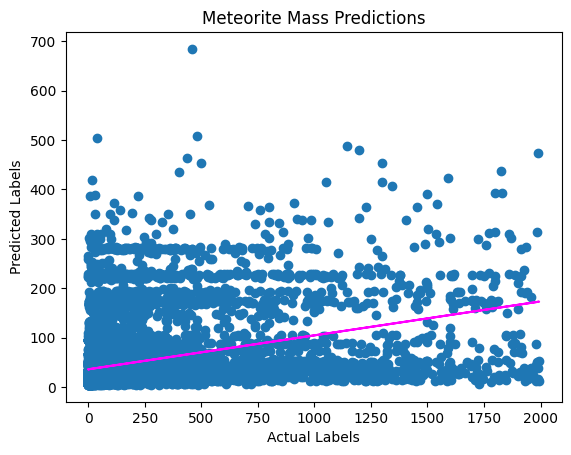

In [123]:
plt.scatter(y_test_exp, vystup_exp)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Meteorite Mass Predictions')
# overlay the regression line
z = np.polyfit(y_test_exp, vystup_exp, 1)
p = np.poly1d(z)
plt.plot(y_test_exp,p(y_test_exp), color='magenta')
plt.show()

In [124]:
print(np.average(y_test_exp))

154.10253958947695


In [125]:
print(np.average(vystup_exp))

46.38208585073334


In [126]:
print(np.median(y_test_exp))

25.591394577576324


In [127]:
print(np.median(vystup_exp))

25.444975320117926


In [128]:
print(np.average(y_test))

3.3361774779236484


In [129]:
print(np.average(vystup))

3.336737987711719


In [130]:
print(np.median(y_test))

3.242592351485517


In [131]:
print(np.median(vystup))

3.2368539003213366


In [132]:
y_sorted = np.sort(y)

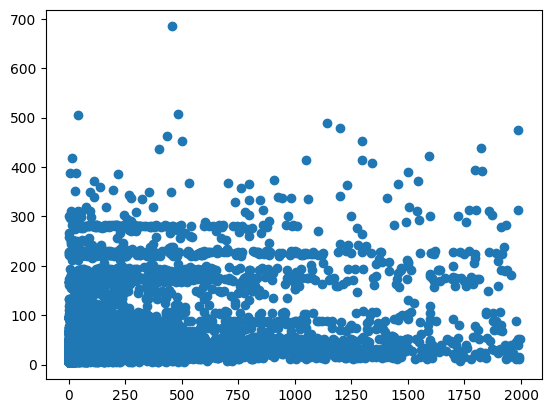

In [133]:
plt.scatter(y_test_exp,vystup_exp)
plt.show()

In [134]:
print(len(y_sorted))

42217


In [135]:
list_array = []
for i in range(42367):
    list_array.append(i)
    

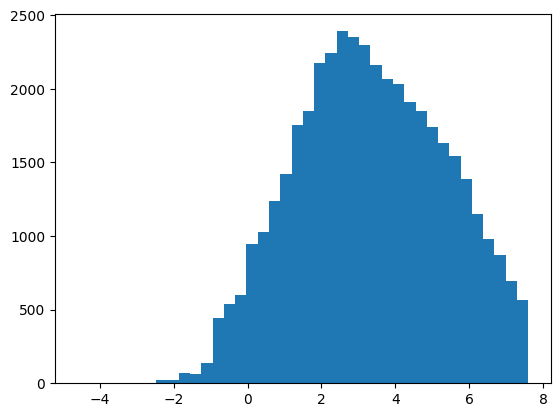

In [136]:
plt.hist(y_sorted,bins=40)
plt.show()

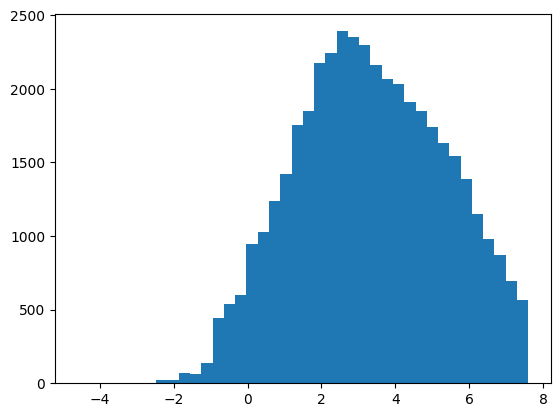

In [137]:
plt.hist(y_log,bins=40)
plt.show()

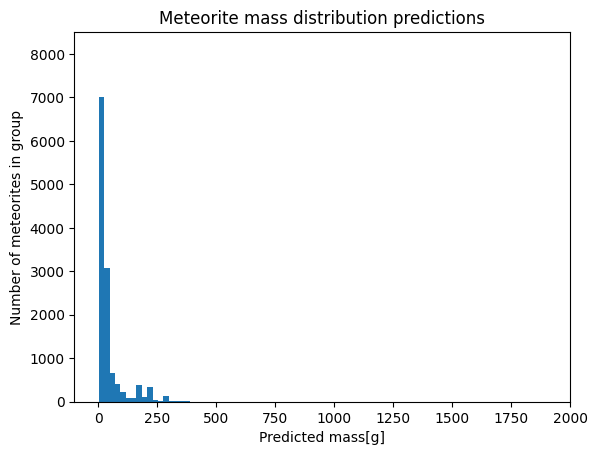

In [165]:
plt.hist(vystup_exp,bins=30)
plt.xlabel('Predicted mass[g]')
plt.ylabel('Number of meteorites in group')
plt.title('Meteorite mass distribution predictions')
plt.xlim([-100, 2000])
plt.ylim([0, 8500])
plt.show()

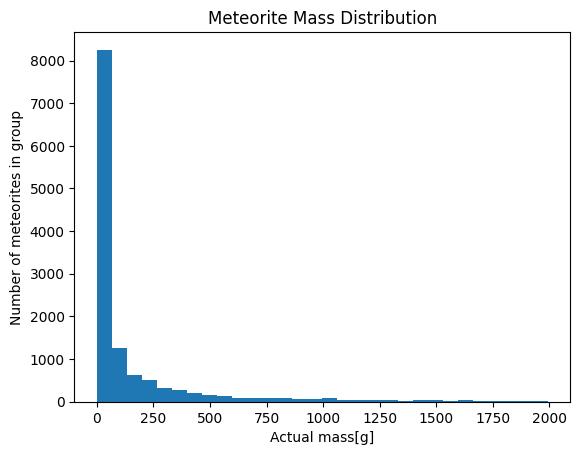

In [164]:
plt.hist(y_test_exp,bins=30)
plt.xlabel('Actual mass[g]')
plt.ylabel('Number of meteorites in group')
plt.title('Meteorite Mass Distribution')
plt.show()

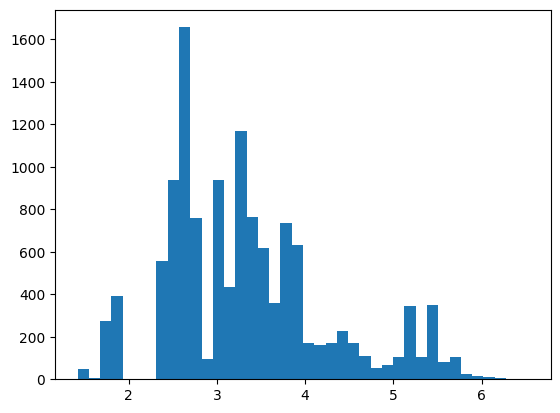

In [140]:
plt.hist(vystup,bins=40)
plt.show()

In [141]:
print(len(vystup))

12666


In [142]:
print(len(y_test_exp))

12666


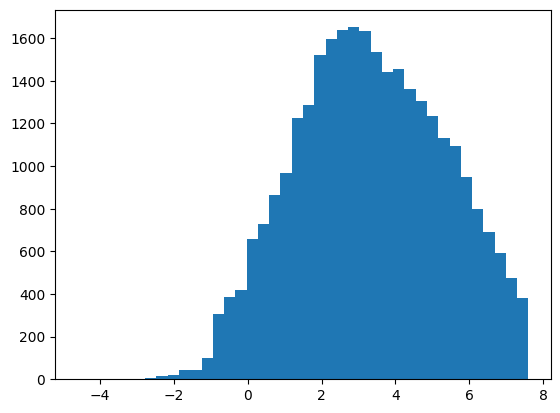

In [143]:
plt.hist(y_train, bins=40)
plt.show()

In [144]:
print(len(y_train))

29551


In [145]:
print(len(y_train)+len(vystup))

42217


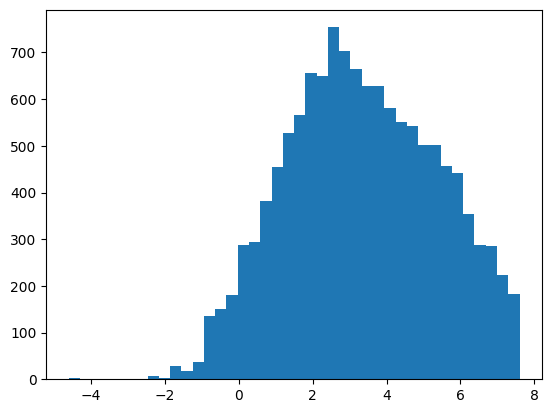

In [146]:
plt.hist(y_test, bins=40)
plt.show()

In [147]:
print(np.log(2.718))

0.999896315728952


In [148]:
print(np.min(y_log))

-4.605170185988091


In [206]:
from mpl_toolkits import mplot3d

In [ ]:
#49.224153, 16.577321

In [ ]:
#['id','year', 'reclat', 'reclong']

In [173]:
X_BOOM = np.array([[42218,2023,49.287641,16.629920]])

In [174]:
results = np.power(2.718,(reg.predict(X_BOOM)))
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
103.37


In [192]:
X_BOOM_VUT = np.array([[42219,2023,49.224153,16.577321]])

In [193]:
results = np.power(2.718,(reg.predict(X_BOOM_VUT)))
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
103.23


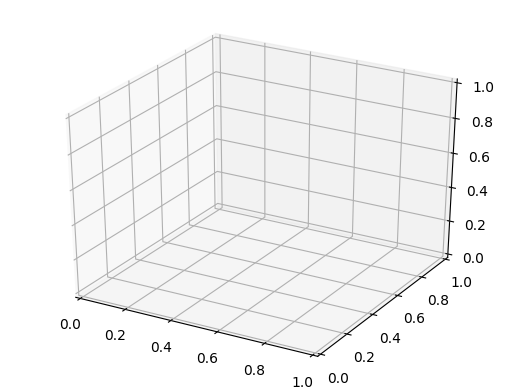

In [215]:
fig = plt.figure()
ax = plt.axes(projection='3d')